PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING


In [84]:
import pandas as pd
import numpy as np

In [85]:
#Câu1: Viết hàm load_data() để tải dữ liệu lên ứng dụng. Sau đó, hiển thị ra màn hình 10 dòng đầu tiên.
#Tạo hàm load data
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Load data
column_names = ["PassengerId", "Survived", "Pclass", "Name", 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare','Cabin', 'Embarked']
file_path = 'titanic_disaster.csv'
data = load_data(file_path)

# In 10 dòng đầu
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [86]:
#Câu 2: Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heatmap). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán dữ liệu còn thiếu
missing_data = data.isnull().sum()
print(missing_data)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


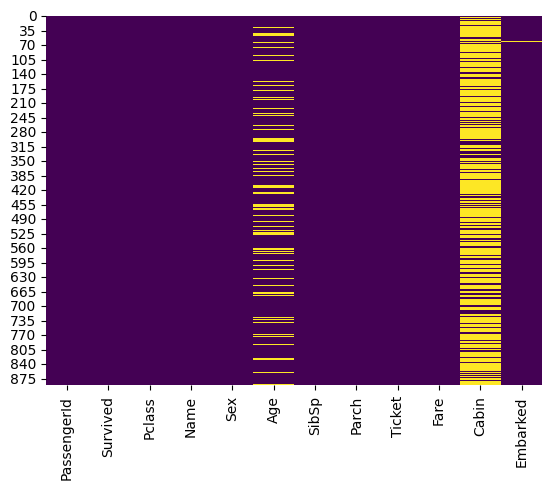

Age, Cabin, and Embarked columns have missing data.


In [87]:
# trực quan hóa dữ liệu còn thiếu
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.show()

# nhận xét
print("Age, Cabin, and Embarked columns have missing data.")

In [88]:
#Câu 3: Xử lý tên cột tên Name, tách ra làm 2 cột: firstName và secondName. Lưu ý: Sau khi tách cột xong thì xóa luôn cột Name
data[['Firstname','Secondname']] = data['Name'].str.split(',', 1, expand=True)
data = data.drop('Name', axis=1)
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,Secondname
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


In [89]:
#Câu 4: Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male M và female F
data['Sex'] = data['Sex'].replace({'male': 'M', 'female': 'F'})

# hiển thị data sau sửa đổi
data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,Secondname
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry
5,6,0,3,M,NaN,0,0,330877,8.4583,NaN,Q,Moran,Mr. James
6,7,0,1,M,54.0,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J
7,8,0,3,M,2.0,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard
8,9,1,3,F,27.0,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9,10,1,2,F,14.0,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem)


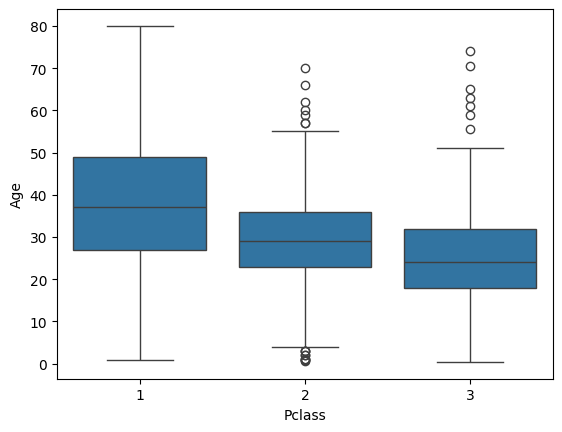

In [90]:
#Câu 5: Xử lý dữ liệu thiếu trên biến Age bằng cách thay thế bằng giá trị trung bình tuổi
#Sử dụng Seaborn để vẽ biểu đồ (Box plot)
sns.boxplot(x='Pclass', y='Age', data=data)

#thay thế giá trị Age bị thiếu. Sau đó, hiển thị kết quả dạng bảng và trực quan dữ liệu đã xử lý thiếu cho cột‘Age‘ bằng biểu đồ Heat map.
data['Age'] = data.groupby('Pclass')['Age'].transform(lambda x: x.fillna(x.mean()))

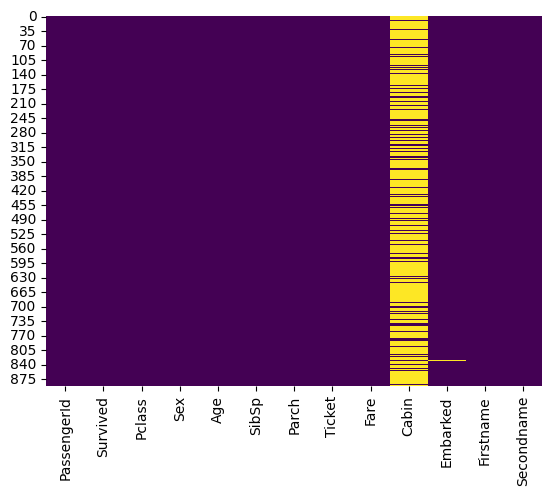

In [91]:
# hiển thị 10 dòng đầu
data.head(10)

# trực quan hóa dữ liệu còn thiếu
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')

plt.show()

In [92]:
#Câu 6: Xây dựng biến số Agegroup có thang đo thứ tự được ánh xạ theo thang đo khoảng dựa trên độ tuổi của hành khách như sau: (age =< 12]  Kid; (12, 18]: Teen, (18, 60]: Adult và ( age > 60): Older
bins = [0, 12, 18, 60, data['Age'].max()]
labels = ['Kid', 'Teen', 'Adult', 'Older']
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,Secondname,AgeGroup
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen


In [93]:
#Câu 7: Tiến hành thêm đặc trưng về danh xưng (namePrefix) trong xã hội bằng cách tách Mr,Mrs, Miss, Master ra khỏi ―secondName‖
data['namePrefix'] = data['Secondname'].str.extract('([A-Za-z]+)\.', expand=False)

data.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,Secondname,AgeGroup,namePrefix
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs


In [94]:
#Câu 8: Khai thác thêm thông tin số lượng thành viên đi theo nhóm thân quen (familySize) đối với mỗi hành khách trên chuyến hải trình; family size = 1+ SibSp + Parch
data['familySize'] = 1 + data['SibSp'] + data['Parch']

data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,Secondname,AgeGroup,namePrefix,familySize
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr,1
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr,1
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master,5
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs,3
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs,2


In [95]:
#Câu 9: Tạo thêm đặc trưng ‗Alone‘ để xác định hành khách đi theo nhóm hay cá nhân bằng cách dựa trên familySize như sau: Nếu familySize = 0 thì giá trị Alone = 1 và ngược lại là 0.
# zác định hành khách nào 'alone'
data['Alone'] = data['familySize'].apply(lambda x: 1 if x == 1 else 0)

# hiển thị 10 dòng đầu
data.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,Secondname,AgeGroup,namePrefix,familySize,Alone
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,1
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,1
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr,1,1
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr,1,1
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master,5,0
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs,3,0
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs,2,0


In [96]:
#Câu 10: Tiến hành tách loại cabin (typeCabin) mà hành khách ở để lọc và phân tích đặc tính cabin. Loại cabin được kí hiệu bởi chữ cái đầu tiên. Lưu ý: Đối với dữ liệu cabin bị thiếu thì thay thế bằng ―Unknown‖
# trích xuất loại 'cabin'
data['typeCabin'] = data['Cabin'].str[0].fillna('Unknown')

# hiển thị 10 dòng đầu
data.head(10)


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Firstname,Secondname,AgeGroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.00000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0,Unknown
1,2,1,1,F,38.00000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0,C
2,3,1,3,F,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,1,Unknown
3,4,1,1,F,35.00000,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0,C
4,5,0,3,M,35.00000,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,1,Unknown
5,6,0,3,M,25.14062,0,0,330877,8.4583,NaN,Q,Moran,Mr. James,Adult,Mr,1,1,Unknown
6,7,0,1,M,54.00000,0,0,17463,51.8625,E46,S,McCarthy,Mr. Timothy J,Adult,Mr,1,1,E
7,8,0,3,M,2.00000,3,1,349909,21.0750,NaN,S,Palsson,Master. Gosta Leonard,Kid,Master,5,0,Unknown
8,9,1,3,F,27.00000,0,2,347742,11.1333,NaN,S,Johnson,Mrs. Oscar W (Elisabeth Vilhelmina Berg),Adult,Mrs,3,0,Unknown
9,10,1,2,F,14.00000,1,0,237736,30.0708,NaN,C,Nasser,Mrs. Nicholas (Adele Achem),Teen,Mrs,2,0,Unknown


PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA


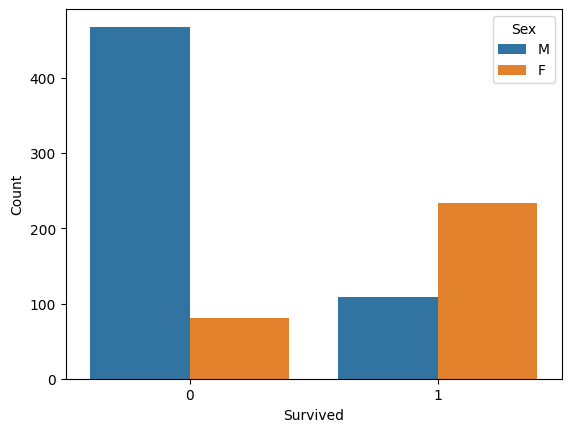

In [99]:
#Câu 12: Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính
sns.countplot(x='Survived', hue='Sex', data=data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

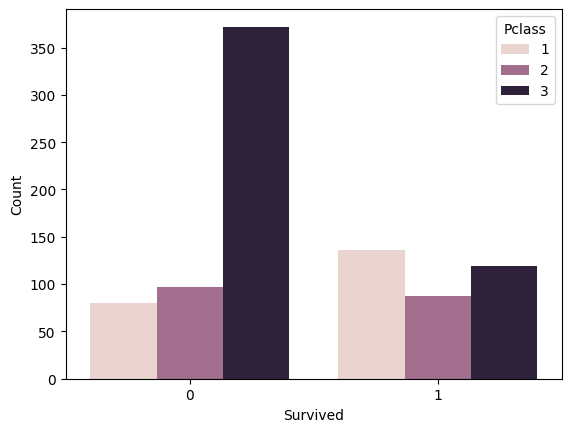

In [100]:
# Câu 13. Biểu đồ tỉ lệ sống sót trên từng nhóm phân loại hành khách (Pclass)
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

c:\Users\Anh Thu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anh Thu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 5.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anh Thu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 25.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Anh Thu\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:3399: UserWarning: 12.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.

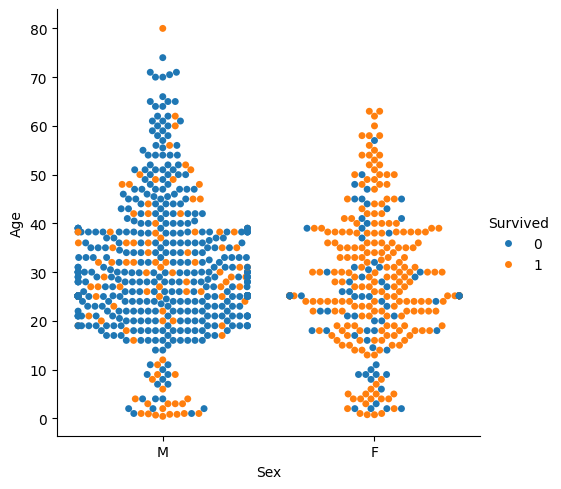

In [106]:
#Câu 14. Biểu đồ sống sót trên từng nhóm giới tính và thang đo tuổi tác
sns.catplot(x='Sex', y='Age', hue='Survived', kind='swarm', data=data)
plt.xlabel('Sex')
plt.ylabel('Age')
plt.show()

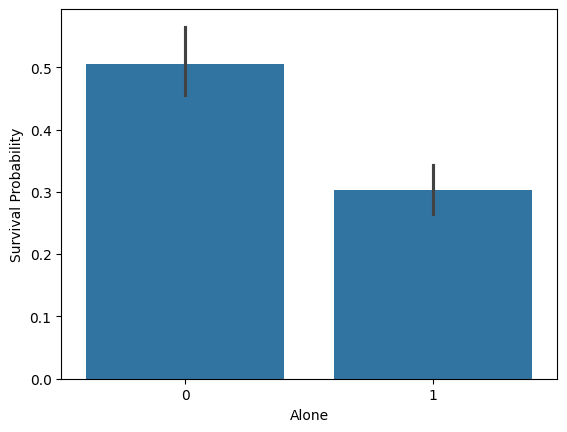

In [107]:
#Câu 15. Biểu đồ xác suất sống sót dựa trên thông tin nhóm đi cùng
sns.barplot(x='Alone', y='Survived', data=data)
plt.xlabel('Alone')
plt.ylabel('Survived')
plt.show()

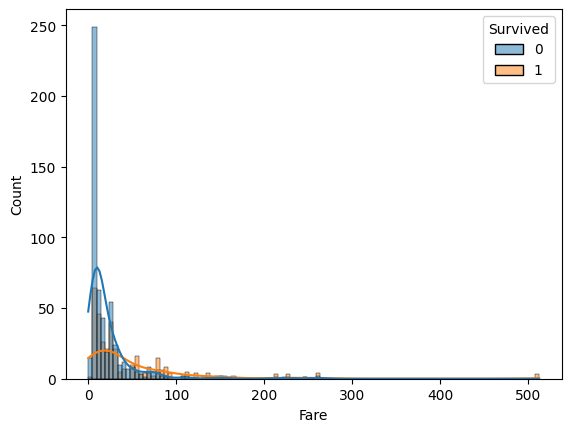

In [108]:
#Câu 16. Biểu đồ xác suất sống sót dựa trên thông tin giá vé
sns.histplot(x='Fare', hue='Survived', data=data, kde=True)
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

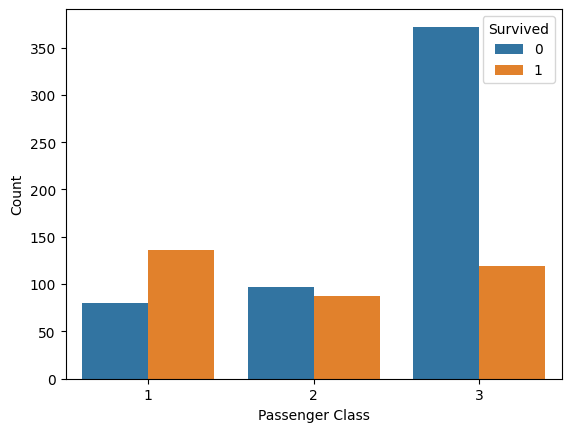

In [109]:
#Câu 17. Biểu đồ số người thiệt mạng và sống sót theo phân lớp hành khách và cảng sẽ cập bến
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()